In [15]:
import sys
sys.path.append('/Users/gomez/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time

from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | marystown
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bage
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | buckingham
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | kirkland lake
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | edd
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | cam pha
City not found. Skipping...
Processing Record 22 of Set 1 | shelburne
Processing Record 23 of Set 1 | san policarpo
Processing Record 24 of Set 1 | a

Processing Record 40 of Set 4 | karratha
Processing Record 41 of Set 4 | burla
Processing Record 42 of Set 4 | willmar
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | chicama
Processing Record 47 of Set 4 | izumo
Processing Record 48 of Set 4 | sosnovo-ozerskoye
Processing Record 49 of Set 4 | lipnita
Processing Record 50 of Set 4 | tarko-sale
Processing Record 1 of Set 5 | soto la marina
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | yanchukan
City not found. Skipping...
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | kuche
City not found. Skipping...
Processing Record 7 of Set 5 | akdepe
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | jiangyou
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | hithadhoo
Processing Record 12 

Processing Record 24 of Set 8 | cidreira
Processing Record 25 of Set 8 | mitsamiouli
Processing Record 26 of Set 8 | koumac
Processing Record 27 of Set 8 | zhigansk
Processing Record 28 of Set 8 | ulladulla
Processing Record 29 of Set 8 | bonthe
Processing Record 30 of Set 8 | camacha
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | narsaq
Processing Record 33 of Set 8 | zapadnaya dvina
Processing Record 34 of Set 8 | mackay
Processing Record 35 of Set 8 | melfort
Processing Record 36 of Set 8 | sistranda
Processing Record 37 of Set 8 | hirado
Processing Record 38 of Set 8 | boa vista
Processing Record 39 of Set 8 | virginia beach
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | benjamin constant
Processing Record 42 of Set 8 | ayr
Processing Record 43 of Set 8 | moron
Processing Record 44 of Set 8 | tahta
Processing Record 45 of Set 8 | bethanien
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | russkoye
Processing Recor

Processing Record 12 of Set 12 | kumluca
Processing Record 13 of Set 12 | sisimiut
Processing Record 14 of Set 12 | beloha
Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | doctor arroyo
Processing Record 17 of Set 12 | pangkalanbuun
Processing Record 18 of Set 12 | sayyan
Processing Record 19 of Set 12 | pangnirtung
Processing Record 20 of Set 12 | paita
Processing Record 21 of Set 12 | paro
Processing Record 22 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 23 of Set 12 | katha
City not found. Skipping...
Processing Record 24 of Set 12 | san vicente
Processing Record 25 of Set 12 | sao domingos
Processing Record 26 of Set 12 | agboville
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | cap-aux-meules
Processing Record 29 of Set 12 | spearfish
Processing Record 30 of Set 12 | pacific grove
Processing Record 31 of Set 12 | onega
Processing Record 32 of Set 12 | plouzane
Processing Record 33 of Set 12 | inta
Processing 

In [8]:
print(len(city_data))

562


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.70,-76.22,64.40,77,90,5.82,PE,2020-06-22 23:37:15
1,Thompson,55.74,-97.86,62.60,88,75,4.70,CA,2020-06-22 23:34:11
2,Marystown,47.17,-55.15,55.63,97,98,7.43,CA,2020-06-22 23:38:42
3,Barrow,71.29,-156.79,35.60,74,90,13.87,US,2020-06-22 23:36:18
4,Bredasdorp,-34.53,20.04,44.60,93,0,4.97,ZA,2020-06-22 23:34:05
5,Kaitangata,-46.28,169.85,41.00,87,11,1.99,NZ,2020-06-22 23:37:58
6,Busselton,-33.65,115.33,57.00,72,51,19.89,AU,2020-06-22 23:35:14
7,Bage,-31.33,-54.11,64.40,88,87,13.87,BR,2020-06-22 23:38:43
8,Puerto Ayora,-0.74,-90.35,71.01,92,40,7.00,EC,2020-06-22 23:36:28
9,Mataura,-46.19,168.86,39.00,83,28,3.00,NZ,2020-06-22 23:36:10


In [11]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,PE,2020-06-22 23:37:15,-13.70,-76.22,64.40,77,90,5.82
1,Thompson,CA,2020-06-22 23:34:11,55.74,-97.86,62.60,88,75,4.70
2,Marystown,CA,2020-06-22 23:38:42,47.17,-55.15,55.63,97,98,7.43
3,Barrow,US,2020-06-22 23:36:18,71.29,-156.79,35.60,74,90,13.87
4,Bredasdorp,ZA,2020-06-22 23:34:05,-34.53,20.04,44.60,93,0,4.97


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
today = time.strftime("%x")
today

'06/22/20'

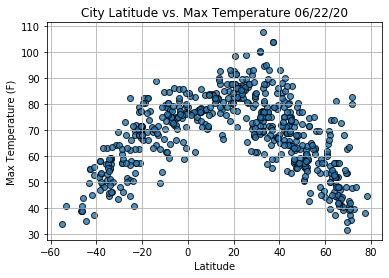

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

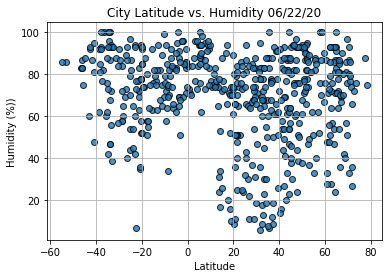

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

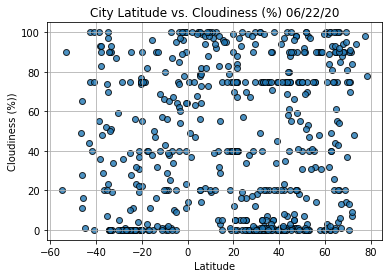

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

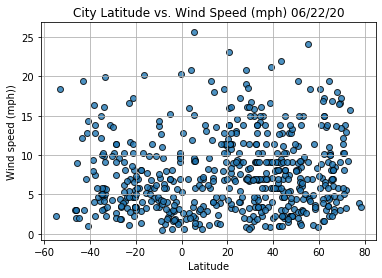

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()